### Ogólne wprowadzenie

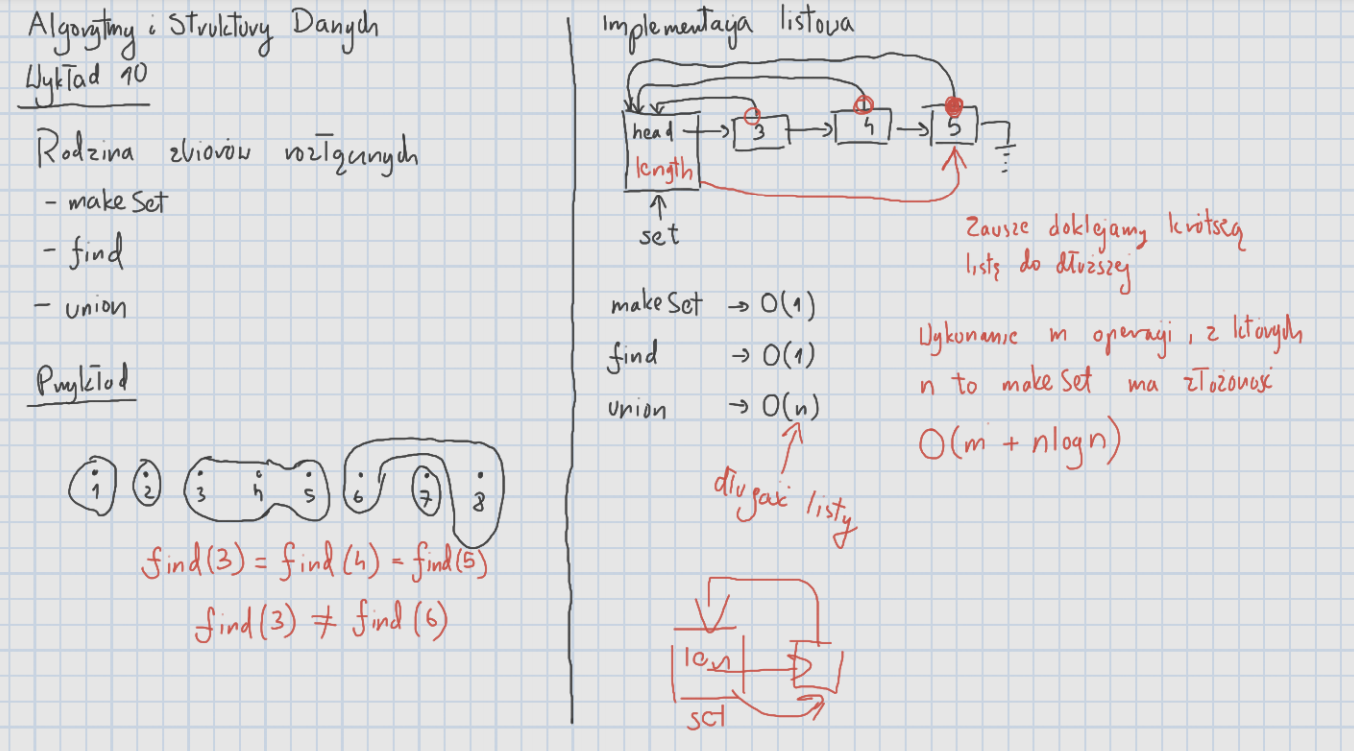
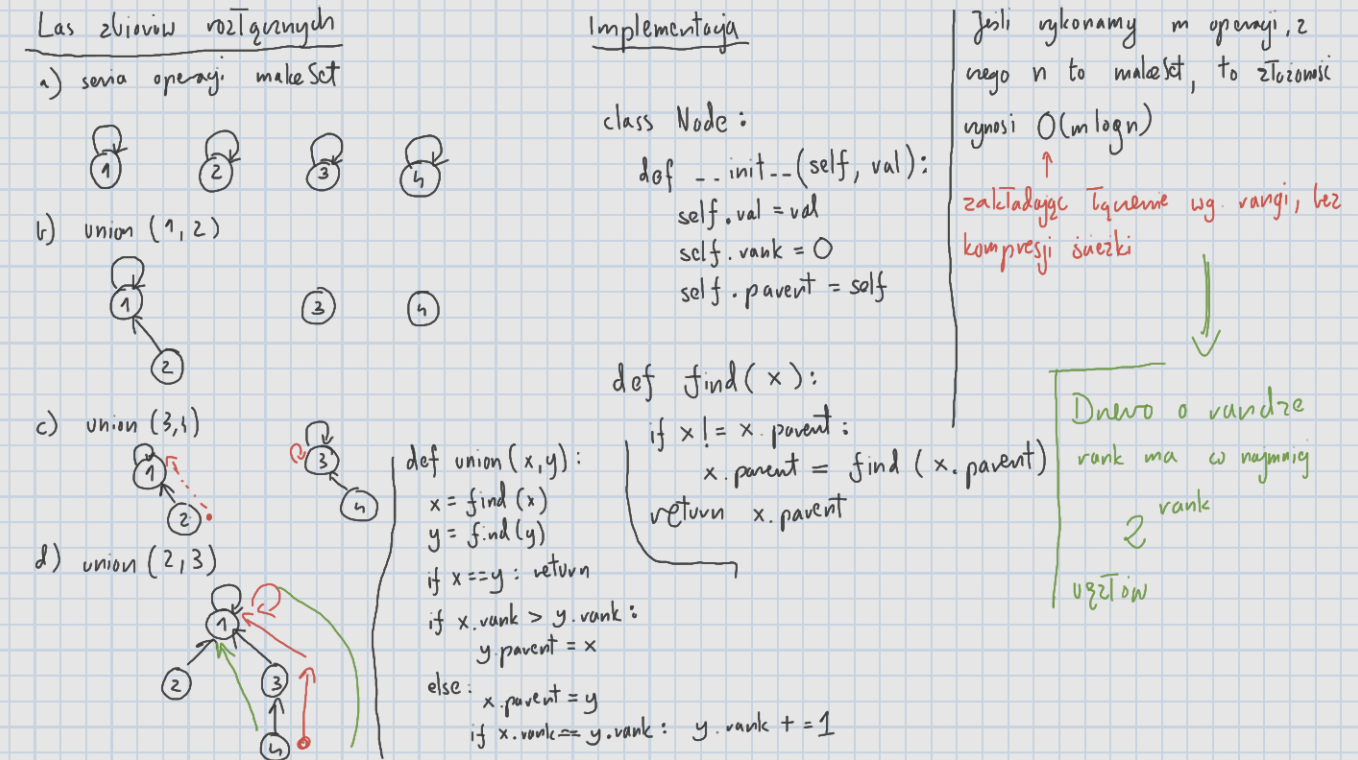
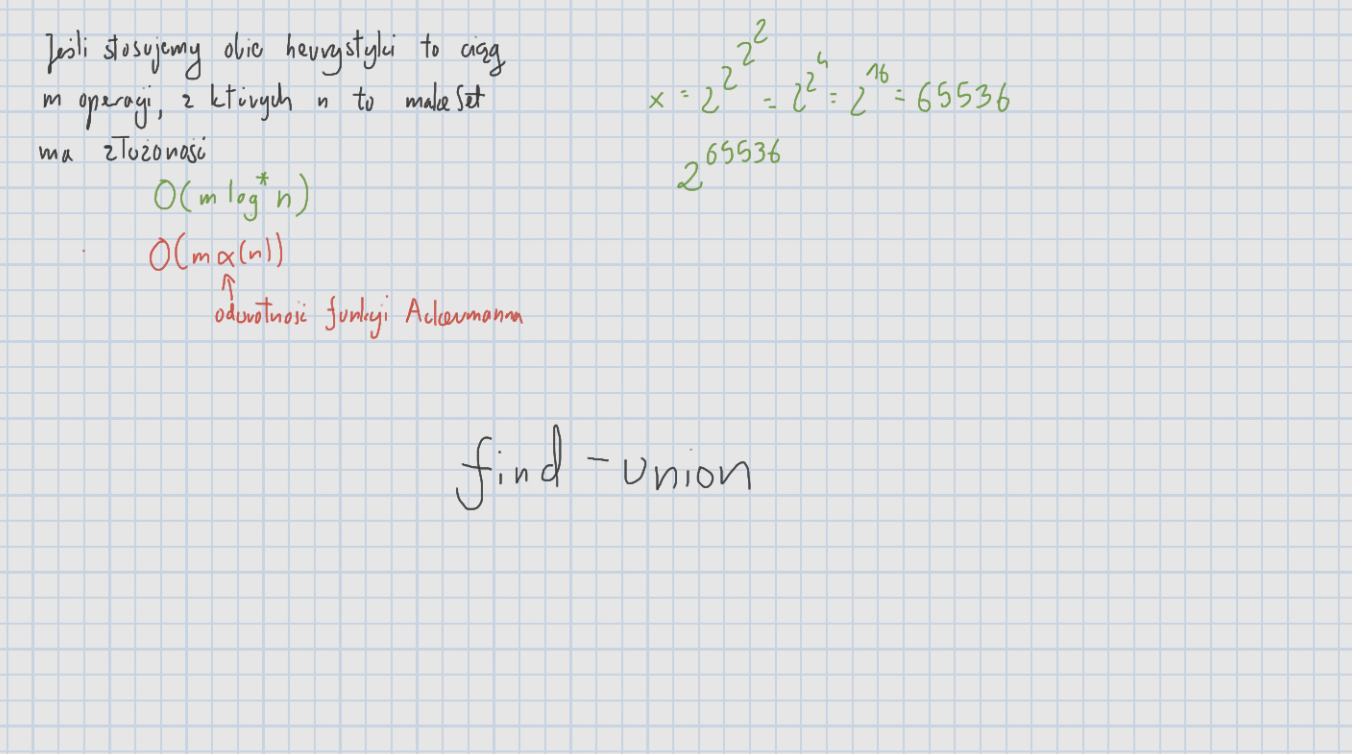

##### Dobre materiały na YouTube:

https://www.youtube.com/watch?v=ibjEGG7ylHk <br>
https://www.youtube.com/watch?v=0jNmHPfA_yE <br>
https://www.youtube.com/watch?v=VHRhJWacxis <br>
https://www.youtube.com/watch?v=KbFlZYCpONw

### Złożoność:

W przypadku tej struktury konieczna jest analiza zamortyzowana
###### Bez kompresji ścieżki:
##### Obliczeniowa:
$ O(m \cdot log(n)) $  - jeżeli wykonamy $ m $ operacji, z czego $ n $ to makeset (czyli $ n \le m $) <br>
(Za operację makeset uznajemy utworzenie nowego 1-elementowego zbioru)
###### Z kompresją ścieżki:
##### Obliczeniowa:
$ O(m \cdot log^*(n)) $  - jeżeli wykonamy $ m $ operacji, z czego $ n $ to makeset (czyli $ n \le m $) <br>
$ log^*(n) $ - logarytm iterowany (praktycznie prawie stała wartość) (więcej informacji tutaj: https://pl.wikipedia.org/wiki/Logarytm_iterowany) <br>
Albo dokładniej (jeszcze lepsze oszacowanie): <br>
$ O(m \alpha({n})) $, gdzie $ \alpha $ - odwrotność funkcji Ackermanna (https://pl.wikipedia.org/wiki/Funkcja_Ackermanna)
<br><br>
W praktyce implementacja struktury FindUnion wraz z kompresją ściezki i oszacowaniem wysokości drzewa, przy pomocy pola rank, w praktyce pozwala na wykonywanie każdej (prawie, zależy od implementacji) z operacji w czasie stałym. (Tworzenie zbioru wieloelementowego wymaga utworzenia każdego ze zbiorów osobno, a następnie ich połączenia)

### Implementacja #1
#### (Z wykładu - funkcyjna - wskaźnikowa)
##### (Z kompresją ścieżki)

In [1]:
class Node:
    def __init__(self, id_):
        self.id = id_
        self.parent = self
        self.rank = 0  # The upper tree's height limit
        

def find(x: 'Node object') -> 'set representative id':
    # If we have to compress a path as we are not a root of a tree
    if x != x.parent:
        # Point all sobsequent nodes on a path to the root node
        x.parent = find(x.parent)
    # Return the current (updated) parent of the node
    return x.parent


def union(x: 'Node object', y: 'Node object'):
    # Find parents of both x and y
    x = find(x)
    y = find(y)
    # Return if x and y are in the same set as there is nothing to do
    if x == y: return
    # Otherwise, link the smaller tree to the larger one
    if x.rank < y.rank:
        x.parent = y
    else:
        y.parent = x
        # If both x and y have the same rank and y was linked to x,
        # we have to increase the rank of x
        if x.rank == y.rank: x.rank += 1
            
            
def make_set(x: 'id'):
    return Node(x)

###### Kilka testów

In [2]:
sets = [make_set(i) for i in range(8)]

for i in range(8):
    print(f'{i + 1} representative: {find(sets[i]).id + 1}')
    
print('\nMerged 6 and 8:')
union(sets[6 - 1], sets[8 - 1])
union(sets[3 - 1], sets[4 - 1])
union(sets[4 - 1], sets[5 - 1])

print('\nAfter merging:')
for i in range(8):
    print(f'{i + 1} representative: {find(sets[i]).id + 1}')

print('\nCheck if 3, 4, 5 are in the same set:', find(sets[3 - 1]) == find(sets[4 - 1]) == find(sets[5 - 1]))
print('Check if 3 and 6 are in the same set:', find(sets[3 - 1]) == find(sets[6 - 1]))

1 representative: 1
2 representative: 2
3 representative: 3
4 representative: 4
5 representative: 5
6 representative: 6
7 representative: 7
8 representative: 8

Merged 6 and 8:

After merging:
1 representative: 1
2 representative: 2
3 representative: 3
4 representative: 3
5 representative: 3
6 representative: 6
7 representative: 7
8 representative: 6

Check if 3, 4, 5 are in the same set: True
Check if 3 and 6 are in the same set: False


### Implementacja #2
#### (obiektowa - tablicowa)
##### (Z kompresją ścieżki)

In [3]:
class Node:
    def __init__(self, id_):
        self.parent_id = self.id = id_
        self.rank = 0


class UnionFind:
    def __init__(self, size=0):
        self.nodes = [Node(i) for i in range(size)]
        
    def __len__(self):
        return len(self.nodes)
        
    def __getitem__(self, idx):
        if not 0 <= idx < len(self):
            raise IndexError("Item with '{idx}' id not in {self.__class__.__name__}")
        return self.nodes[idx]
        
    def make_set(self):
        """Creates a new 1-element set of the next free id"""
        self.nodes.append(Node(len(self)))
        
    def find(self, x: 'id') -> 'id of the set representative':
        """Return an id of the set representative"""
        id_ = x
        # Find an index of a root of a set
        while self.nodes[id_].parent_id != id_: 
            id_ = self.nodes[id_].parent_id
        # Perform path compression
        while self.nodes[x].parent_id != id_: 
            self.nodes[x].parent_id, x = id_, self.nodes[x].parent_id
        # Return id of the current (updated) root of a tree
        return self.nodes[x].parent_id
        
    def union(self, x: 'id', y: 'id'):
        """Merge the set which x belongs to with the set which y belongs to"""
        # Find the representatives of both sets
        x_node = self.nodes[self.find(x)]
        y_node = self.nodes[self.find(y)]
        # Return if x and y belong to the same set
        if x == y: return
        # Otherwise, link the smaller tree (based on its rank) to the larger one
        if x_node.rank < y_node.rank:
            x_node.parent_id = y
        else:
            y_node.parent_id = x
            # If both x and y have the same rank and y was linked to x,
            # we have to increase the rank of x
            if x_node.rank == y_node.rank: x_node.rank += 1
        
    def connected(self, x: 'id', y: 'id') -> bool:
        """Returns True if both x and y are in the same set"""
        return self.find(x) == self.find(y)

###### Kilka testów

In [4]:
uf = UnionFind(6)
uf.make_set()
uf.make_set()

for i in range(8):
    print(f'{i + 1} representative: {uf.find(i) + 1}')
    
uf.union(6 - 1, 8 - 1)
uf.union(3 - 1, 4 - 1)
uf.union(4 - 1, 5 - 1)

print('\nAfter merging:')
for i in range(8):
    print(f'{i + 1} representative: {uf.find(i) + 1}')
    
from functools import reduce
print('\nCheck if 3, 4, 5 are in the same set:', uf.find(3 - 1) == uf.find(4 - 1) == uf.find(5 - 1))
print('Check if 3 and 6 are in the same set:', uf.find(3 - 1) == uf.find(6 - 1))

1 representative: 1
2 representative: 2
3 representative: 3
4 representative: 4
5 representative: 5
6 representative: 6
7 representative: 7
8 representative: 8

After merging:
1 representative: 1
2 representative: 2
3 representative: 3
4 representative: 3
5 representative: 3
6 representative: 6
7 representative: 7
8 representative: 6

Check if 3, 4, 5 are in the same set: True
Check if 3 and 6 are in the same set: False
